In [1]:
using Random, Distributions
using SpecialFunctions
using LinearAlgebra
using Plots
Random.seed!(1)

TaskLocalRNG()

In [2]:
## Question 1

For i.i.d draws,
$Var(\bar{X}) = \frac{\sigma^2}{n}$

For Markov chain,
$Var(\bar{Y}) = \frac{\sigma^2}{n} + \sum_{i}Cov(Y_i, Y_{i+1})$


Now, Covariance can be negative or positive so we can't say for sure which one of them will be smaller.

In [3]:
## Question 2
# a. Joint Posterior Distribution

$\pi$($\mu$, d | Y) = $\pi$(d) $\pi$($\mu$ | d) $f$(Y | $\mu$, d)

$\pi(\mu,\, d\, | \, Y) = \dfrac{d^{a_0 - 1} \, e^{-d\, /\, b_0}}{\gamma(a_0) \, b_0^{a_0}}\,\, \mathbb{I}(2<d<\infty)\, \,\dfrac{1}{d^{1/2} \, \beta(1/2,d/2)} \, \,(1+\dfrac{\mu^2}{d})^{-(d+1)/2} \, \, \prod_{i=1}^{N} \dfrac{1}{(2\pi\sigma^2)^{1/2}} e^{\dfrac{-(y_i-\mu)}{2\sigma^2}}$ 

$\pi(\mu, \, d\, |\, Y) \propto \dfrac{d^{a_0 - 1} \, e^{-d\, /\, b_0}}{d^{1/2} \, \beta(1/2,d/2)} \,\,(1+\dfrac{\mu^2}{d})^{-(d+1)/2} \,\,\mathbb{I}(2<d<\infty) \,\,\prod_{i=1}^{N}e^{\dfrac{-(y_i-\mu)}{2\sigma^2}} $

In [3]:
# b. and c. MH algorithm for n = 100, a_0 = 2, b_0 = 0.1

In [4]:
a = 2
b = 0.1
n = 100
sigma = 1

1

In [5]:
# Generate data set

In [6]:
Y = zeros(n)
Z = zeros(n)
gdist = Truncated(Gamma(a, b), 2, Inf)
for i in 1:n
    Z[i] = rand(gdist)
end
df = mean(Z)
tdist = TDist(df)
u = rand(tdist)
ndist = Normal(u, 1)
for i in 1:n
    Y[i] = rand(ndist)
end

In [7]:
# PI function

In [81]:
function PI(x, y)
    z = (y^(a-1) * exp(-y/b) * (1+x^2/y)^(-(y+1)/2)) / ((y^(1/2))*beta(1/2,y))
    for i in 1:n
        z = z * exp(-(Y[i] - x)^2/(2*sigma^2))
    end
    return z
end

PI (generic function with 1 method)

In [62]:
# Alpha function

In [63]:
function alfa(x, y, z, w)
    return min(1, PI(x, y)/PI(z, w))
end

alfa (generic function with 1 method)

In [64]:
# Proposal Distribution = Normal Bivariate
# with correlation factor = 0
# symmetric proposal

In [73]:
sigmax = 1/2
sigmay = 1/2
function proposal(x, y)
    Z = zeros(2)
    Z[1] = rand(Normal(x,sigmax))
    Z[2] = rand(Truncated(Normal(y,sigmay), 2, Inf))
    return Z
end

proposal (generic function with 1 method)

In [74]:
# Initial values
mi = mean(Y)
di = df

2.1168927812422

In [75]:
# MH Algorithm

In [76]:
N = 10000 # 10000 samples

10000

In [77]:
valued = zeros(N)
valuem = zeros(N)
acc = 0
valued[1] = di
valuem[1] = mi
for i in 2:N
    Y_star = proposal(valuem[i-1], valuem[i-1])
    ratio = alfa(Y_star[1], Y_star[2], valuem[i-1], valued[i-1])
    U = rand(Normal(0, 1))
    if U < ratio
        valuem[i] = Y_star[1]
        valued[i] = Y_star[2]
        acc = acc + 1
    else
        valuem[i] = valuem[i-1]
        valued[i] = valued[i-1]
    end
end
println("Mean of the mean = ", mean(valuem))
println("Mean of the degree of freedom = ", mean(valued))
println("Acceptance Probabilty = ", (acc/N))   

Mean of the mean = -1.5107058638068631
Mean of the degree of freedom = 2.088151519860991
Acceptance Probabilty = 0.63


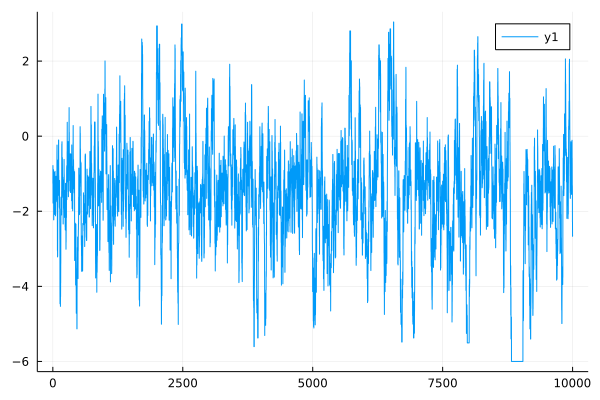

In [78]:
Plots.plot(valuem)

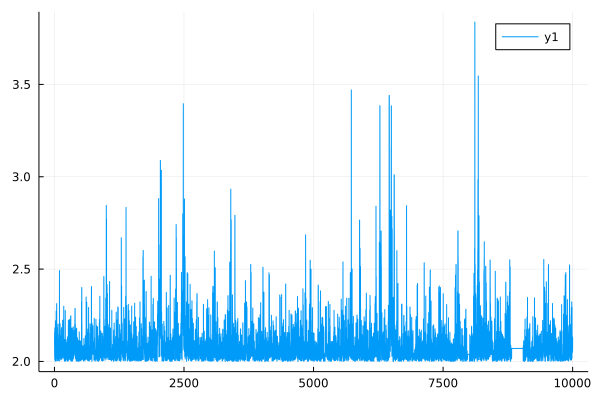

In [79]:
Plots.plot(valued)

In [80]:
## Question 3
# a. Posterior Distribution

$ \pi(\beta, \sigma^2 \, |\,  y) \, = \, \pi(y \, | \, \beta, \sigma^2) \, \pi(\beta\, |\, \sigma^2) \, \pi(\sigma^2)$

$ \pi(\sigma^2) \propto (\dfrac{1}{\sigma^2})^{-a+1} \, e^{-b\, /\, \sigma^2} $

$ \pi(\beta | \sigma^2) \propto \dfrac{1}{(2\pi)^{p/2}\, (|\sigma^2I_p|)^{1/2}} e^{-1/2 \,(\beta-\mu)\, (\sigma^2I_p)^{-1}\, (\beta-\mu)^T}$

$ \pi(y | \beta, \sigma^2) \propto \dfrac{1}{(2\pi)^{n/2}\, (|\sigma^2I_n|)^{1/2}} e^{-1/2 \,(y-X\beta)\, (\sigma^2I_n)^{-1}\, (y-X\beta)^T}$

$ \pi(\beta, \sigma^2 \, |\,  y) \propto \dfrac{1}{(2\pi)^{n/2}\, (|\sigma^2I_n|)^{1/2}} e^{-1/2 \,(y-X\beta)\, (\sigma^2I_n)^{-1}\, (y-X\beta)^T} \, \, \, \dfrac{1}{(2\pi)^{p/2}\, (|\sigma^2I_p|)^{1/2}} e^{-1/2 \,(\beta-\mu)\, (\sigma^2I_p)^{-1}\, (\beta-\mu)^T} \, \, \, (\dfrac{1}{\sigma^2})^{-a+1} \, e^{-b\, /\, \sigma^2} $